In [1]:
''' This project is to predict whether a patient has ckd or not.'''

' This project is to predict whether a patient has ckd or not.'

# About Data

Chronic kidney disease is the Longstanding disease of the kidneys leading to renal failure.

The kidneys filter waste and excess fluid from the blood. As kidneys fail, waste builds up.
Symptoms develop slowly and aren't specific to the disease. Some people have no symptoms at all and are diagnosed by a lab test.
Medication helps manage symptoms. In later stages, filtering the blood with a machine (dialysis) or a transplant may be required

Source : https://www.kaggle.com/mansoordaku/ckdisease 

### Attribute Information:

We use 24  medical features + 1 class = 25 ( 11 numeric ,14 nominal)

1.Age(numerical)
age in years

2.Blood Pressure(numerical)
bp in mm/Hg

3.Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025)

4.Albumin(nominal)
al - (0,1,2,3,4,5)

5.Sugar(nominal)
su - (0,1,2,3,4,5)

6.Red Blood Cells(nominal)
rbc - (normal,abnormal)

7.Pus Cell (nominal)
pc - (normal,abnormal)

8.Pus Cell clumps(nominal)
pcc - (present,notpresent)

9.Bacteria(nominal)
ba - (present,notpresent)

10.Blood Glucose Random(numerical)
bgr in mgs/dl

11.Blood Urea(numerical)
bu in mgs/dl

12.Serum Creatinine(numerical)
sc in mgs/dl

13.Sodium(numerical)
sod in mEq/L

14.Potassium(numerical)
pot in mEq/L

15.Hemoglobin(numerical)
hemo in gms

16.Packed Cell Volume(numerical)

17.White Blood Cell Count(numerical)
wc in cells/cumm

18.Red Blood Cell Count(numerical)
rc in millions/cmm

19.Hypertension(nominal)
htn - (yes,no)

20.Diabetes Mellitus(nominal)
dm - (yes,no)

21.Coronary Artery Disease(nominal)
cad - (yes,no)

22.Appetite(nominal)
appet - (good,poor)

23.Pedal Edema(nominal)
pe - (yes,no)

24.Anemia(nominal)
ane - (yes,no)

25.Class (nominal)
class - (ckd,notckd)



# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix,accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ckd-input/data_description.txt
/kaggle/input/ckd-input/kidney_disease.csv
/kaggle/input/ckdisease/kidney_disease.csv


### Importing the Dataset

In [3]:
df = pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv')

In [4]:
### Run this to Profile data

import pandas_profiling as pp

profile = pp.ProfileReport(    df, title="Chronic Kidney Disease Profile", html={"style": {"full_width": True}}, sort=None)
profile

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 2 Data Cleaning

## a. Renaming the columns in the data to their expanded form

In [5]:
columns=pd.read_csv('../input/ckd-input/data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']
df.columns=columns['abb_col_names'].values


## b. Correcting datatype of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [7]:
features=['red blood cell count','packed cell volume','white blood cell count']
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    
for feature in features:
    convert_dtype(df,feature)
    
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension                object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

## c. Drop the id column

In [8]:
df.drop(["id"],axis=1,inplace=True) 

## d. Cleaning Categorical Columns


In [9]:
cat_col=[col for col in df.columns if df[col].dtype=='object']
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


hypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [10]:
#Replace incorrect values

df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')



for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


hypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




## e. Assigning random values to missing(NaN) Values

In [11]:
data=df.copy()

### Categorical features using Random value Imputation & Mode imputation

In [12]:
data[cat_col].isnull().sum()

red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

#### Random_value_imputation for "red blood cells" & "pus cell"


In [13]:
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

Random_value_imputation('pus cell')
Random_value_imputation('red blood cells')
data[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            4
bacteria                   4
hypertension               2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

#### mode_imputation for all other categorical features

In [14]:
def mode_imputation(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)
    
for col in cat_col:
    mode_imputation(col)
    
data[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

### Numerical features using Random value Imputation

In [15]:
num_col=[col for col in df.columns if df[col].dtype!='object']
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [16]:
for col in num_col:
    Random_value_imputation(col)
    
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

# 3. Data Visualization

###  label distribution for Class data

Text(0.5, 1.0, 'target Class')

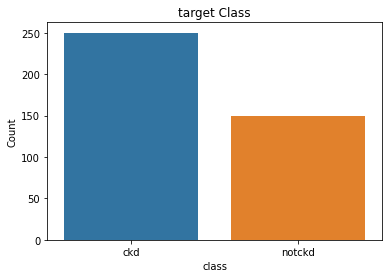

In [17]:
sns.countplot(x='class',data=data)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

###  Label distribution for Numerical data

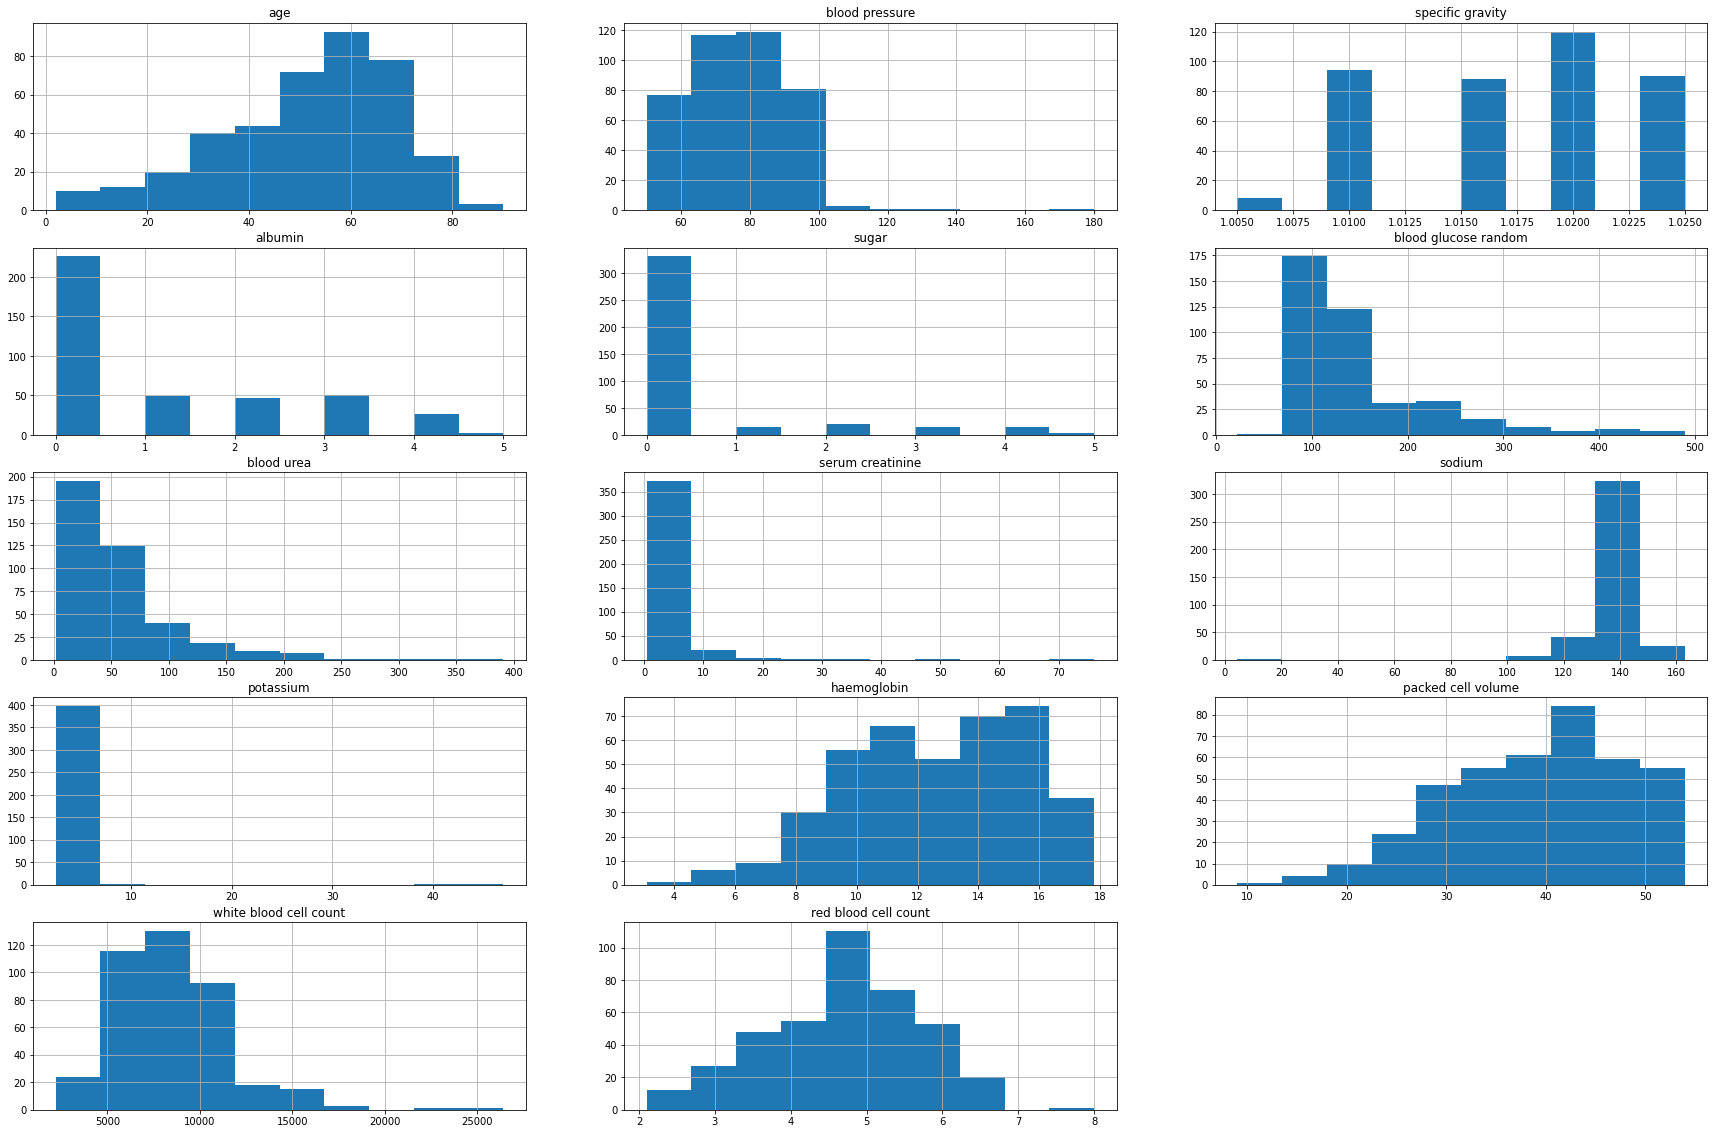

In [18]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    data[feature].hist()
    plt.title(feature)

    Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

###  Label distribution for Categorical data

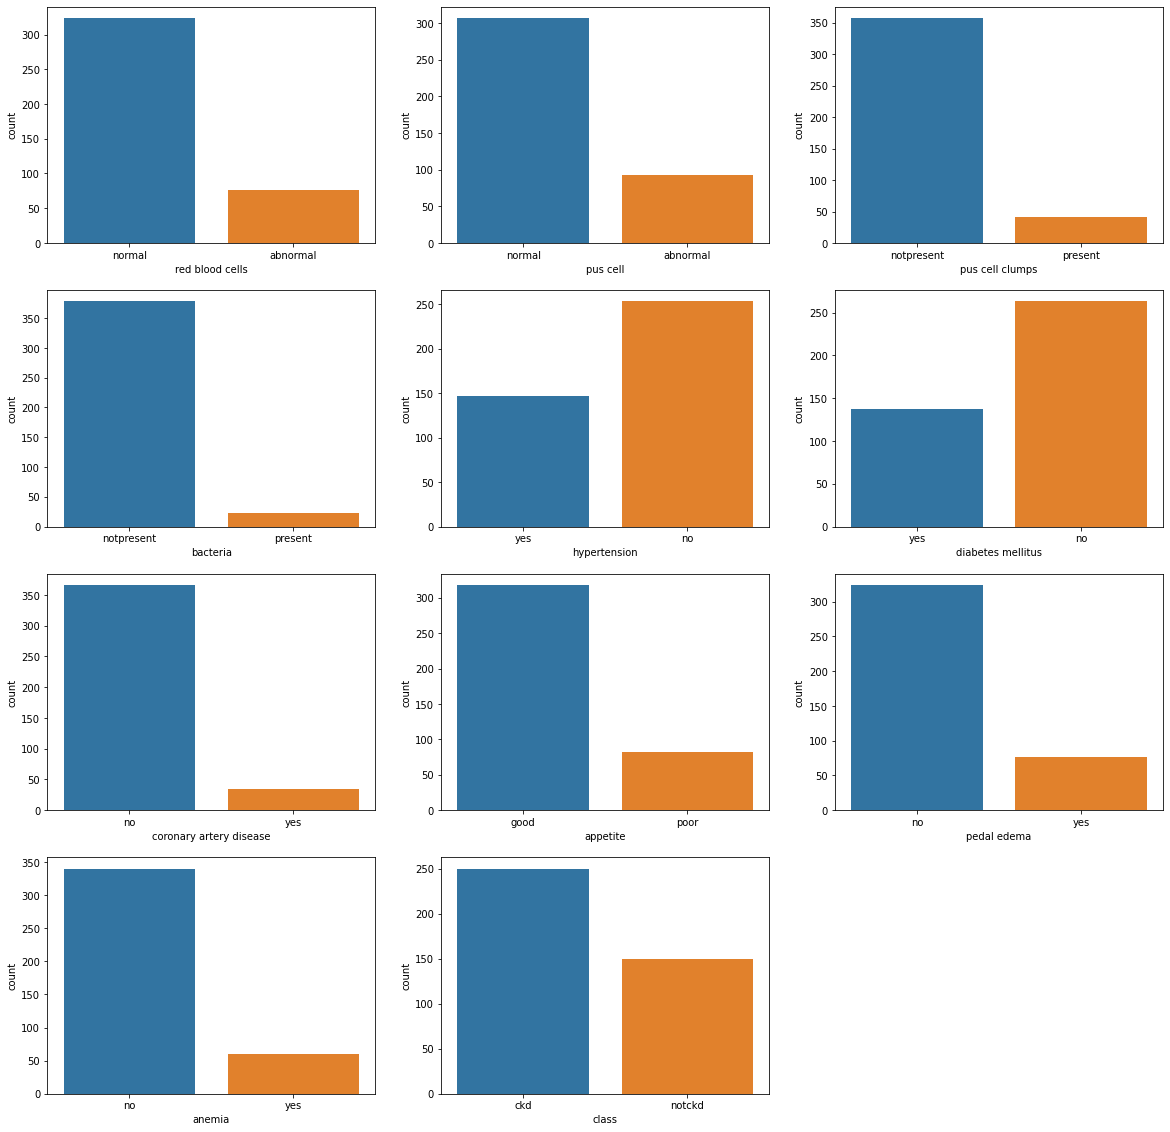

In [19]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(data[feature])
    

    A few features has imbalanced categories. Stratified folds will be necessary while cross validation.

### Correlations

<AxesSubplot:>

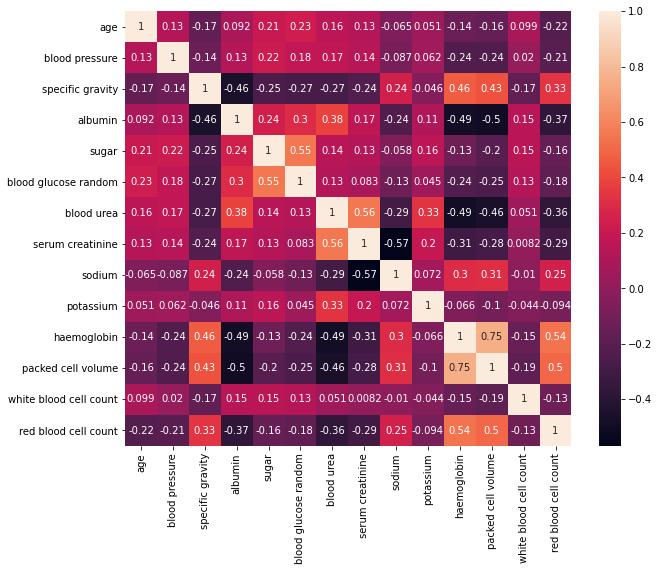

In [20]:
plt.figure(figsize=(10,8))
corr_df = data.corr()
sns.heatmap(corr_df,annot=True)

    Positive Correlation:
    Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Hemoglobin -> Red Blood cell count <- packed cell volume
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
    Serum creatinine -> Sodium

In [21]:
data.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        75  4.370667     4.6  2.5  6.4
                notckd      1  4.900000     4.9  4.9  4.9
normal          ckd       175  4.261143     4.2  2.1  8.0
                notckd    149  5.350336     5.3  2.5  6.5

### Let's check for Positive correlation and its impact on classes¶

In [22]:
px.violin(data,y='red blood cell count',x="class", color="class")

In [23]:
px.scatter(df,'haemoglobin','packed cell volume')

### analysing distribution of 'red_blood_cell_count' in both Labels 

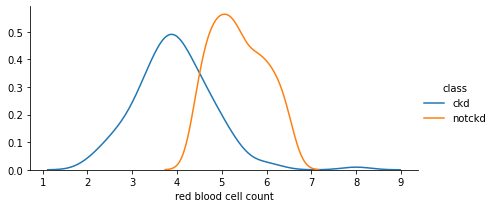

In [24]:
grid=sns.FacetGrid(df, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

    Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

### Defining violin and scatter plot & kde_plot functions

In [25]:
def violin(col):
    fig = px.violin(data, y=col, x="class", color="class", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(data, x=col1, y=col2, color="class")
    return fig.show()

def kde_plot(feature):
    grid = sns.FacetGrid(data, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

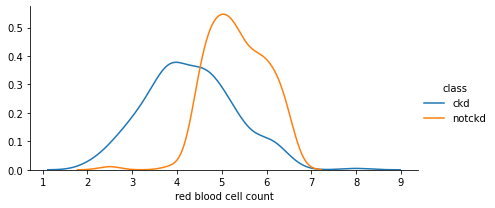

In [26]:
kde_plot('red blood cell count')

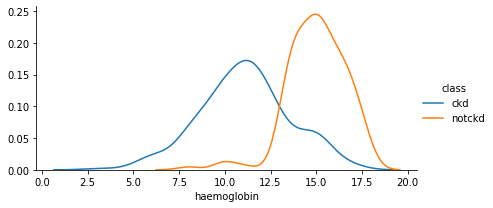

In [27]:
kde_plot('haemoglobin')

In [28]:
scatters('red blood cell count', 'packed cell volume')

In [29]:
scatters('red blood cell count', 'haemoglobin')

In [30]:
scatters('haemoglobin','packed cell volume')

    1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
    disease(i.e ckd).
    2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
    disease(i.e nockd).

In [31]:
violin('red blood cell count')

In [32]:
violin('packed cell volume')

###  Now let's check for negative correlation and its impact on classes

    Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [33]:
scatters('red blood cell count','albumin')

    Clearly, albumin levels of above 0 affect ckd largely

In [34]:
scatters('packed cell volume','blood urea')

    Packed cell volume >= 40 largely affects to be non ckd

In [35]:
fig = px.bar(data, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',
             height=400)
fig.show()

   

 Clearly, specific gravity >=1.02 affects non ckd

# 4. Feature Encoding / Label Encoder

In [36]:
for col in cat_col:
    print('{} categories in the column- {} '.format(data[col].nunique(), col))
    

2 categories in the column- red blood cells 
2 categories in the column- pus cell 
2 categories in the column- pus cell clumps 
2 categories in the column- bacteria 
2 categories in the column- hypertension 
2 categories in the column- diabetes mellitus 
2 categories in the column- coronary artery disease 
2 categories in the column- appetite 
2 categories in the column- pedal edema 
2 categories in the column- anemia 
2 categories in the column- class 


#### as we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality

In [37]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in cat_col:
    data[col]=le.fit_transform(data[col])
    
data.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0         1                0         0                 121.0  ...   
1         1                0         0                 131.0  ...   
2         1                0         0                 423.0  ...   
3         0                1         0                 117.0  ...   
4         1                0         0                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.4   
2                31.0                  7500.0                   3.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes mellitus  coronary artery disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   pedal edema  anemia  class  
0            0       0      0  
1            0       0      0  
2            0       1      0  
3            1       1      0  
4            0       0      0  

[5 rows x 25 columns]

# 5. Feature Selection

chi2-Internally this class is going to check that whether p-value is less than 0.05 or not based on that,it will order all the features

In [38]:
from sklearn.feature_selection import SelectKBest #Also known as Information Gain
from sklearn.feature_selection import chi2

ind_col=[col for col in data.columns if col!='class']
dep_col='class'

x=data[ind_col]
y=data[dep_col] 

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(x,y)

datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])

dfcolumns=pd.DataFrame(x.columns)

features_rank=pd.concat([dfcolumns,datascores],axis=1)

features_rank.columns=['Features','Score']

# features_rank.nlargest(10,'Score')  --->  fetch largest 10 values of Score column   

selected_columns=features_rank.nlargest(10,'Score')['Features'].values
X_new=data[selected_columns]
X_new

white blood cell count  blood urea  blood glucose random  \
0                    7800.0        36.0                 121.0   
1                    6000.0        18.0                 131.0   
2                    7500.0        53.0                 423.0   
3                    6700.0        56.0                 117.0   
4                    7300.0        26.0                 106.0   
..                      ...         ...                   ...   
395                  6700.0        49.0                 140.0   
396                  7800.0        31.0                  75.0   
397                  6600.0        26.0                 100.0   
398                  7200.0        50.0                 114.0   
399                  6800.0        18.0                 131.0   

     serum creatinine  packed cell volume  albumin   age  haemoglobin  sugar  \
0                 1.2                44.0      1.0  48.0         15.4    0.0   
1                 0.8                38.0      4.0   7.0         11.3    0.0   
2                 1.8                31.0      2.0  62.0          9.6    3.0   
3                 3.8                32.0      4.0  48.0         11.2    0.0   
4                 1.4                35.0      2.0  51.0         11.6    0.0   
..                ...                 ...      ...   ...          ...    ...   
395               0.5                47.0      0.0  55.0         15.7    0.0   
396               1.2                54.0      0.0  42.0         16.5    0.0   
397               0.6                49.0      0.0  12.0         15.8    0.0   
398               1.0                51.0      0.0  17.0         14.2    0.0   
399               1.1                53.0      0.0  58.0         15.8    0.0   

     hypertension  
0               1  
1               0  
2               0  
3               1  
4               0  
..            ...  
395             0  
396             0  
397             0  
398             0  
399             0  

[400 rows x 10 columns]

# 6. Model

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.7, random_state=123)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

names = [
    "CatBoostClassifier",
    "Support Vector Machine",
    "Decision Tree",
    "Neural Network",
    "Random Forest",
    "XGBoost",
    "LGBMClassifier",
    "XGBRFClassifier",
    "GradientBoosting",
    "GaussianNB",
    "KNeighborsClassifier"
]
models = [
    CatBoostClassifier(verbose= False),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    lightgbm.LGBMClassifier(max_depth=2, random_state=4),
    xgboost.XGBRFClassifier(max_depth=3, random_state=1),
    GradientBoostingClassifier(max_depth=2, random_state=1),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
]

accuracy=[]

Confusion matrix of  CatBoostClassifier
[[72  6]
 [ 0 42]]
Accuracy score is  0.95
Confusion matrix of  Support Vector Machine
[[78  0]
 [42  0]]
Accuracy score is  0.65
Confusion matrix of  Decision Tree
[[57 21]
 [ 1 41]]
Accuracy score is  0.8166666666666667
Confusion matrix of  Neural Network
[[66 12]
 [ 4 38]]
Accuracy score is  0.8666666666666667
Confusion matrix of  Random Forest
[[74  4]
 [ 2 40]]
Accuracy score is  0.95
[20:02:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix of  XGBoost
[[72  6]
 [ 0 42]]
Accuracy score is  0.95
Confusion matrix of  LGBMClassifier
[[73  5]
 [ 0 42]]
Accuracy score is  0.9583333333333334
[20:02:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was cha

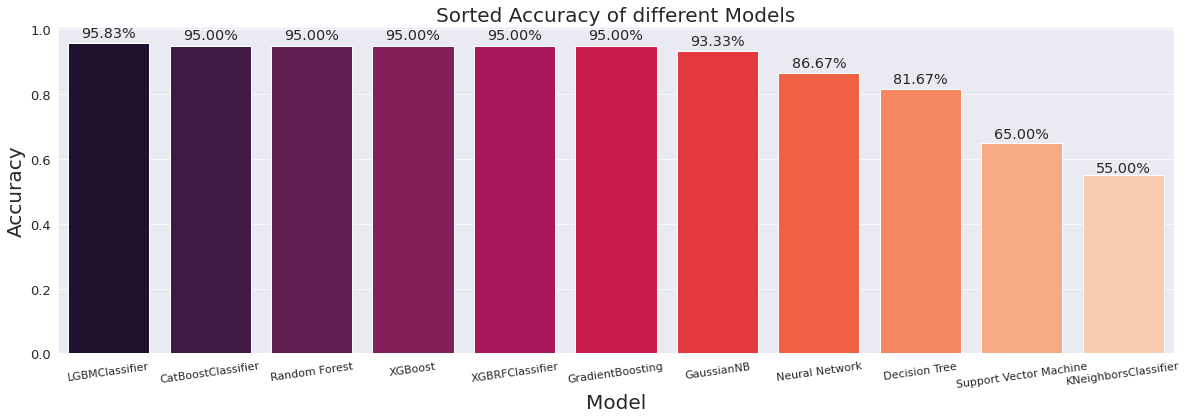

In [40]:
for model, name in zip(models,names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ',ac)
    accuracy.append(ac)
    print('='*50)

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

plt.rcParams['figure.figsize']=20,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Sorted Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

 # Please let me know in the comments what improvements can be done 